In [13]:
from matplotlib import pyplot
import numpy as np
import struct
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from hardposit import from_double, from_bits

pyplot.rcParams['figure.figsize'] = [20, 10]


In [2]:
bits16_range = range(0,0xFFFF)
bits8_range = range(0,0xFF)


In [3]:
posit16_arr = [from_bits(bits,16,2) for bits in bits16_range]
posit8_arr = [from_bits(bits,8,2) for bits in bits8_range]
posit80_arr = [from_bits(bits,8,0) for bits in bits8_range]
posit81_arr = [from_bits(bits,8,1) for bits in bits8_range]

real16_arr = [posit.eval() for posit in posit16_arr]
real8_arr = [posit.eval() for posit in posit8_arr]
real80_arr = [posit.eval() for posit in posit80_arr]
real81_arr = [posit.eval() for posit in posit81_arr]

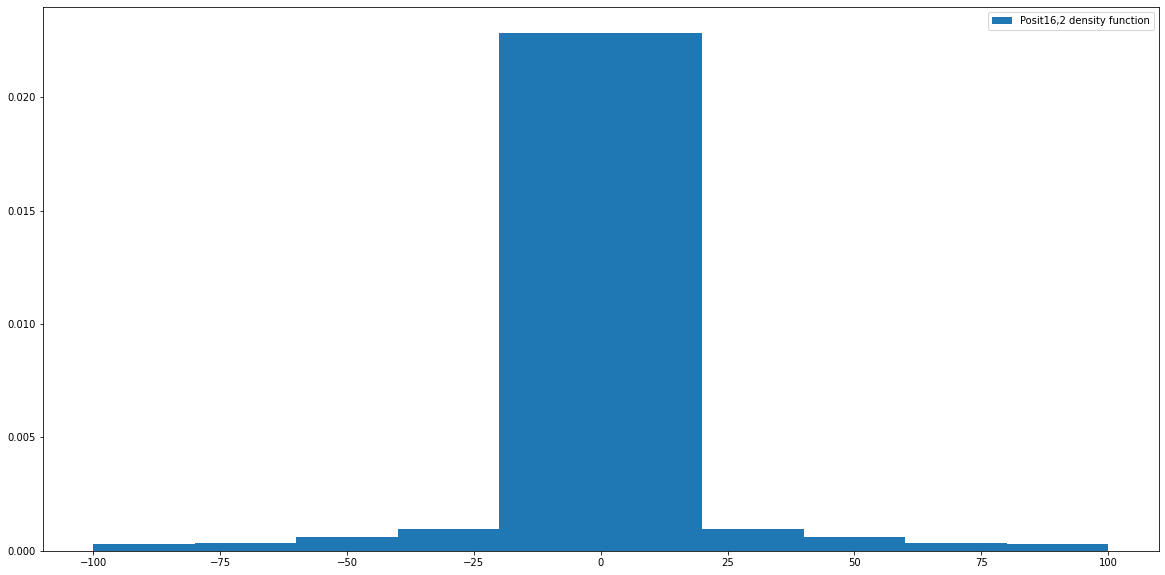

In [14]:
pyplot.hist(real16_arr, range=(-100,100), density=True, label="Posit16,2 density function")
pyplot.legend()

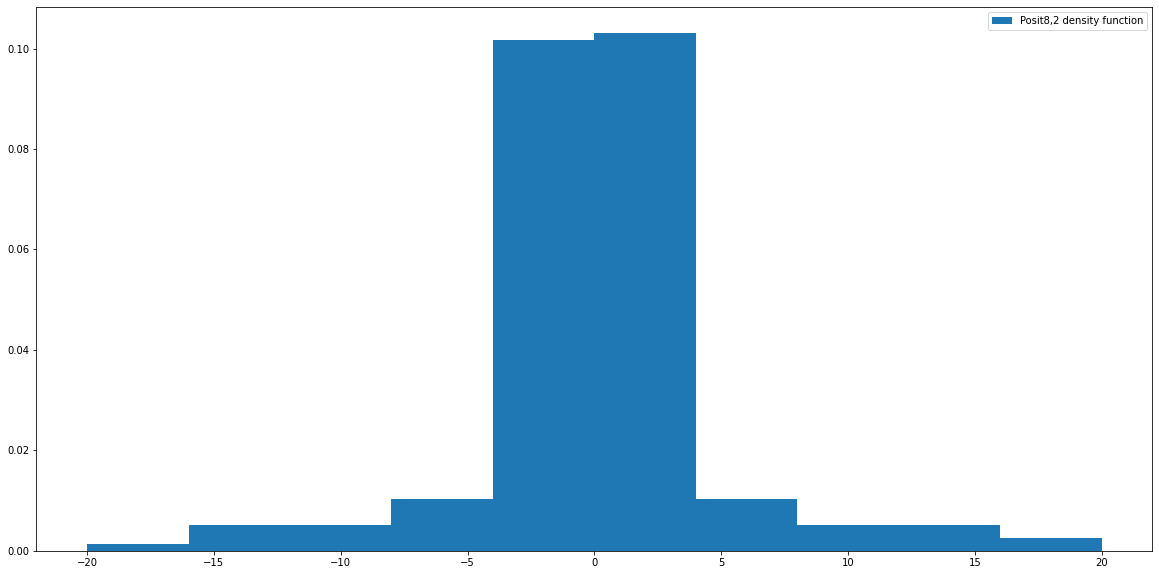

In [15]:
pyplot.hist(real8_arr, range=(-20,20), density=True, label="Posit8,2 density function")
pyplot.legend();

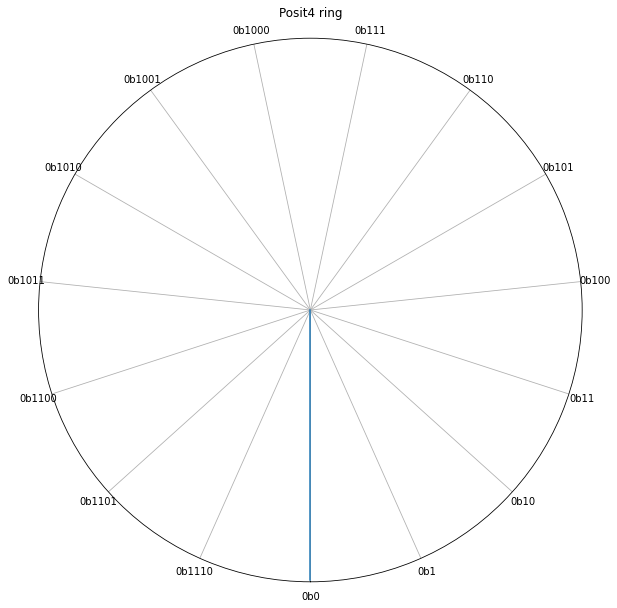

In [16]:
bits4_integers = (np.arange(0,0xF))
bits4_range = 2 * np.pi * bits4_integers / 0xF

bits4_strings = [bin(integer) for integer in bits4_integers]
bits4_range 
r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * np.ones(r.shape)

fig, ax = pyplot.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r)
ax.set_rmax(2)
ax.set_xticks(bits4_range)
ax.set_xticklabels(bits4_strings)
ax.set_theta_zero_location('S')

ax.set_rticks([])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title("Posit4 ring", va='bottom')
pyplot.show()

In [7]:
resolution8 = np.ediff1d(real8_arr)
resolution80 = np.ediff1d(real80_arr)
resolution81 =  np.ediff1d(real81_arr)

resolution16 = np.ediff1d(real16_arr)

In [17]:
@interact(xlim=1.5,ylim=0.2)
def plot(xlim,ylim):
    fig, ax = pyplot.subplots()
    ax.plot(real8_arr[:-1],resolution8,label="Posit8,2 resolution")
    ax.plot(real8_arr[:-1],resolution81,label="Posit8,1 resolution",color="red")
    ax.plot(real8_arr[:-1],resolution80, label="Posit8,0 resolution")
    ax.legend()
    ax.set_xlim(-xlim,xlim)
    ax.set_ylim(0,ylim);

interactive(children=(FloatSlider(value=1.5, description='xlim', max=4.5, min=-1.5), FloatSlider(value=0.2, de…

In [131]:
def getFracLen(posit):
    try:
        reg_len = posit.fields.unwrap().regime.reg_len
        exp_len = min(posit.es, posit.size - reg_len - 1)
        return posit.size - exp_len - reg_len - 1
    except:
        return 0
    
def getMaxFracRegion(nbits,esbits):
    useed = 2**(2**esbits)
    lbound = 1/useed
    rnextbound = from_double(useed,nbits,esbits)
    rbound = from_bits(rnextbound.to_bits()-1,nbits,esbits)
    return [-rbound.eval(),-lbound]

def getEpsilonAroundOne(nbits,esbits):
    one = from_double(1.0,nbits,esbits)
    nextOne = from_bits(one.to_bits()+1,nbits,esbits)
    return (nextOne - one)


In [132]:
fracs80 = [getFracLen(posit) for posit in posit80_arr]
fracs81 = [getFracLen(posit) for posit in posit81_arr]
fracs82 = [getFracLen(posit) for posit in posit8_arr]

In [133]:
print(getMaxFracRegion(8,0))
print(getMaxFracRegion(8,1))
print(getMaxFracRegion(8,2))
print("")
print(getMaxFracRegion(16,0))
print(getMaxFracRegion(16,1))
print(getMaxFracRegion(16,2))
print("")
print(getMaxFracRegion(32,0))
print(getMaxFracRegion(32,1))
print(getMaxFracRegion(32,2))

[-1.96875, -0.5]
[-3.875, -0.25]
[-15.0, -0.0625]

[-1.9998779296875, -0.5]
[-3.99951171875, -0.25]
[-15.99609375, -0.0625]

[-1.9999999981373549, -0.5]
[-3.9999999925494194, -0.25]
[-15.999999940395355, -0.0625]


| nbits | esbits | lower | upper |
|-------|--------|-------|-------|
|8|0|0.5|1.96875|

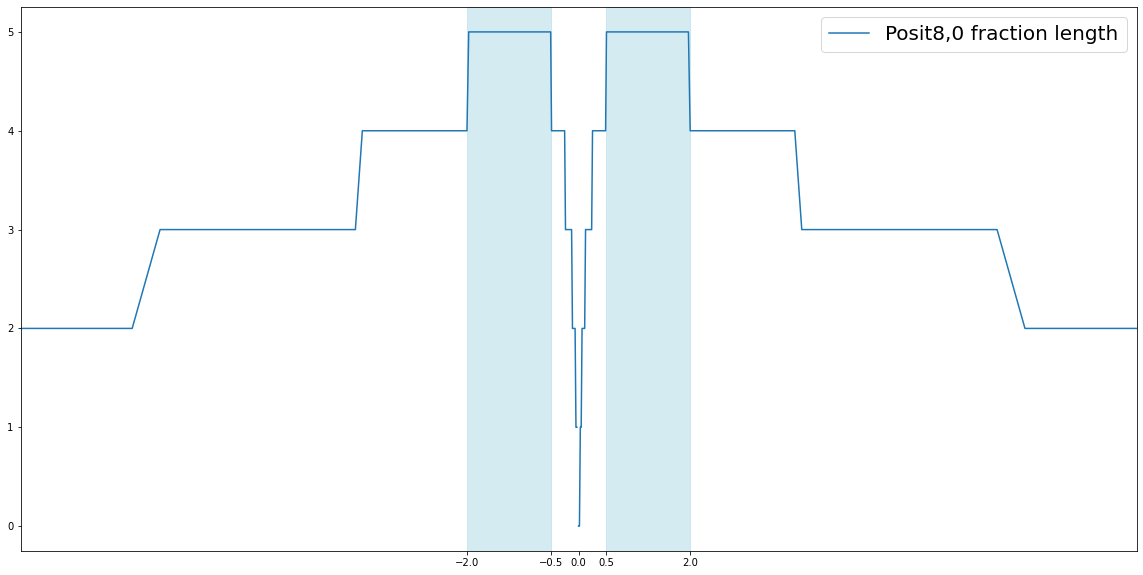

In [63]:
fig, ax = pyplot.subplots()
ax.plot(real80_arr,fracs80,label="Posit8,0 fraction length")
ax.legend(prop={'size': 20})
ax.axvspan(-2,-0.5,color='lightblue', alpha=0.5)
ax.axvspan(0.5,2,color='lightblue', alpha=0.5)
ax.set_xticks(list(ax.get_xticks()) + [-2,-0.5,0.5,2])
ax.set_xlim(-10,10);



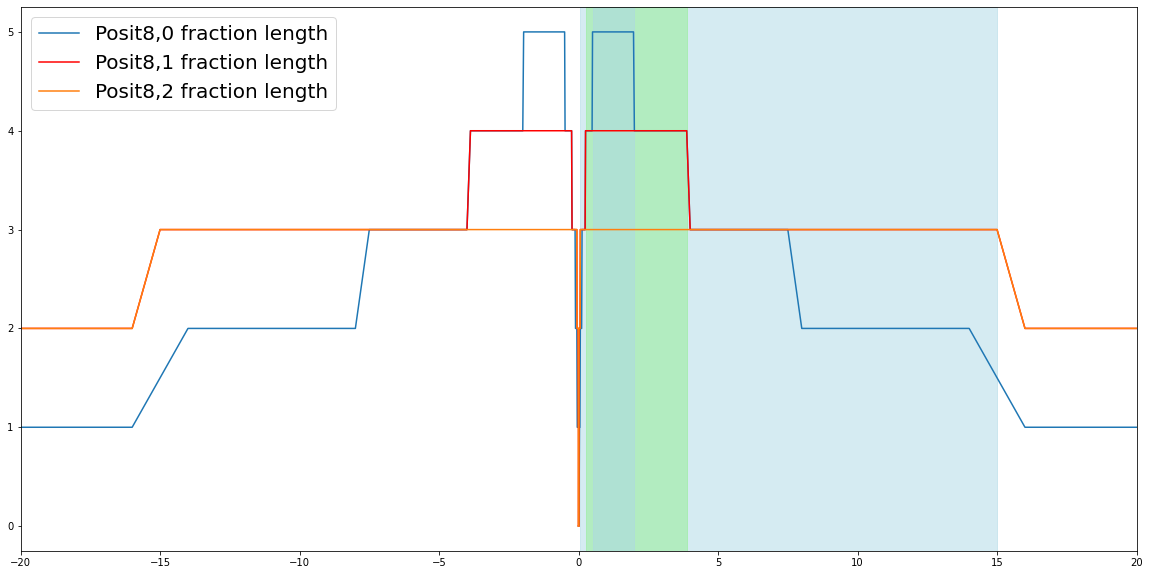

In [85]:
fig, ax = pyplot.subplots()
ax.plot(real80_arr,fracs80,label="Posit8,0 fraction length")
ax.plot(real81_arr,fracs81,label="Posit8,1 fraction length", color="red")
ax.plot(real8_arr,fracs82,label="Posit8,2 fraction length")

ax.set_xlim(-20,20);
ax.legend(prop={'size': 20})
ax.axvspan(1/16,15,color='lightblue', alpha=0.5)
ax.axvspan(1/4,3.875,color='lightgreen', alpha=0.5)
ax.axvspan(0.5,1.96875,color='lightblue', alpha=0.5);








16 0.0625
